In [3]:
import warnings
warnings.filterwarnings("ignore")

#  Model Explainability: Credit Card Fraud Detection

This notebook explores explainability for our XGBoost model trained on the credit card dataset using SHAP **(SHapley Additive exPlanations)**.

We’ll load the trained XGBoost model for the fraud dataset, apply SHAP to understand both **global** and **local** feature importance, and generate plots like the **summary plot** and **force plot**.

Our goal is to identify which features most influence fraud predictions and explain them clearly in our final report.

In [ ]:
import sys 
import os
import pandas as pd 
import shap
import joblib

sys.path.append(os.path.abspath("../"))
from src.utils.utils import load_data
from src.core.DataTransformer import FraudPreprocessor
from src.models.model_trainer import ModelTrainer

# Load dataset
df = pd.read_csv("../data/processed/cleaned_creditcard_data.csv")
X = df.drop(columns="Class")
y = df["Class"]

# Load model
model = joblib.load("../models/CreditCard Model/xgboost_creditcard.pkl")

# Prepare preprocessed data
preprocessor = FraudPreprocessor(mode="creditcard_data", sampler="auto")
preprocessor.fit(X, y)
X_transformed = preprocessor.transform(X)

2025-07-25 07:18:17,975 - INFO - numexpr.utils - NumExpr defaulting to 4 threads.
2025-07-25 07:18:32,597 - INFO - fraud_pipeline - Fitting FraudPreprocessor for mode: creditcard_data
2025-07-25 07:18:32,838 - INFO - fraud_pipeline - ColumnTransformer fitted
2025-07-25 07:18:32,839 - INFO - fraud_pipeline - Transforming data with trained encoders/scalers
2025-07-25 07:18:32,966 - INFO - fraud_pipeline - Transformation complete → shape: (283726, 29)


100%|===================| 283672/283726 [71:59<00:00]        

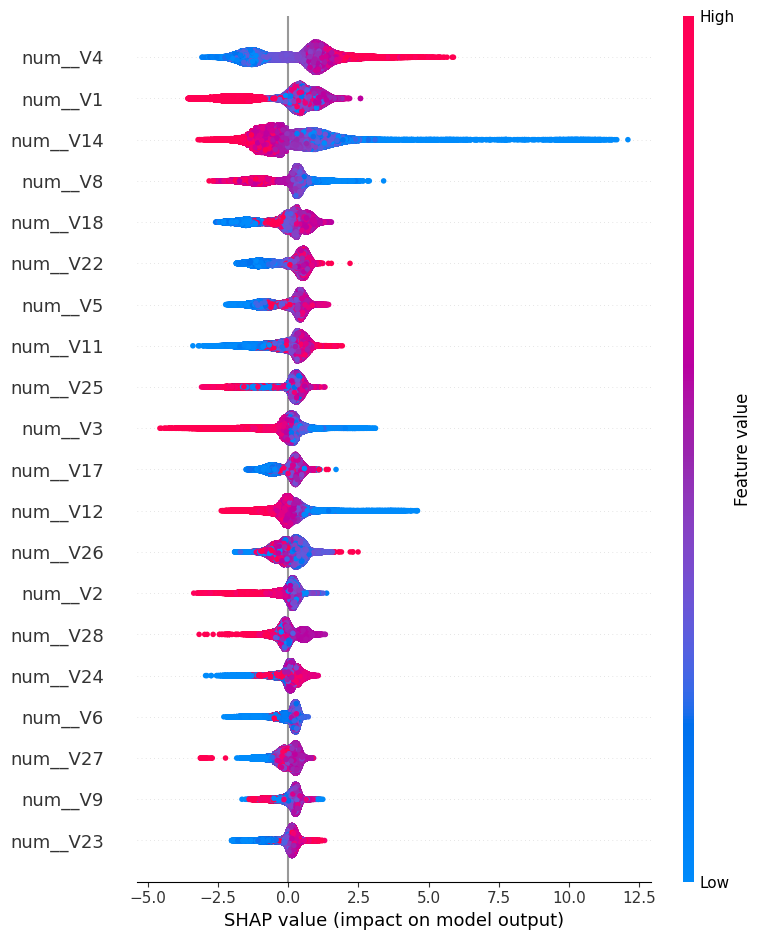

In [10]:
# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_transformed)
shap_values = explainer(X_transformed)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_transformed)

## Global Feature Importance Interpretation (SHAP Summary)

The SHAP summary plots collectively reveal which features have the most significant influence on the model's output across the dataset. Here's a breakdown of the key insights:

### Top Influential Features
- `num__V4`, `num__V1`, and `num__V14` stand out with the highest SHAP value ranges, indicating strong predictive power in driving model decisions.
- High SHAP values for these features consistently push predictions toward the positive class, especially for elevated input values (red dots clustered toward the right) and for the num__v14 lower valuse tend to puth it to the fraud case.

### Feature Behavior & Value Influence
- Many features show a clear gradient where **higher feature values increase the model’s output**, as seen in red-shaded dots skewed to the right. For example:
  - `num__V1` and `num__V12`: High values correspond to strong positive SHAP impacts.
  - `num__V26` and `num__V2`: Lower values (blue dots) also seem to push the prediction positively, suggesting possible inverse relationships.

- Features like `num__V24`, `num__V6`, and `num__V27` display more **heterogeneous behavior**, with both low and high values appearing across the SHAP spectrum—hinting at complex interactions or non-linear effects.

### Subtle Signals in Mid-Tier Features
- `num__V9`, `num__V23`, and `num__V28` still contribute meaningfully, though their SHAP impact is less extreme. Their importance might stem from consistent but modest effects, or synergy with other features in decision paths.

### Observational Notes
- The density of dots, especially in upper-ranked features, confirms their relevance not just in magnitude but across many samples—suggesting robustness and generalization in model learning.
- Violin shapes for features like `num__V17` and `num__V12` imply sharper effects with narrower distributions, which can reflect more stable feature contributions.

---

Overall, the model places high emphasis on a concentrated group of features, while leveraging subtler patterns from others to boost predictive performance. These insights are key to downstream decisions on feature selection, explainability dashboards, and possible model refinement.


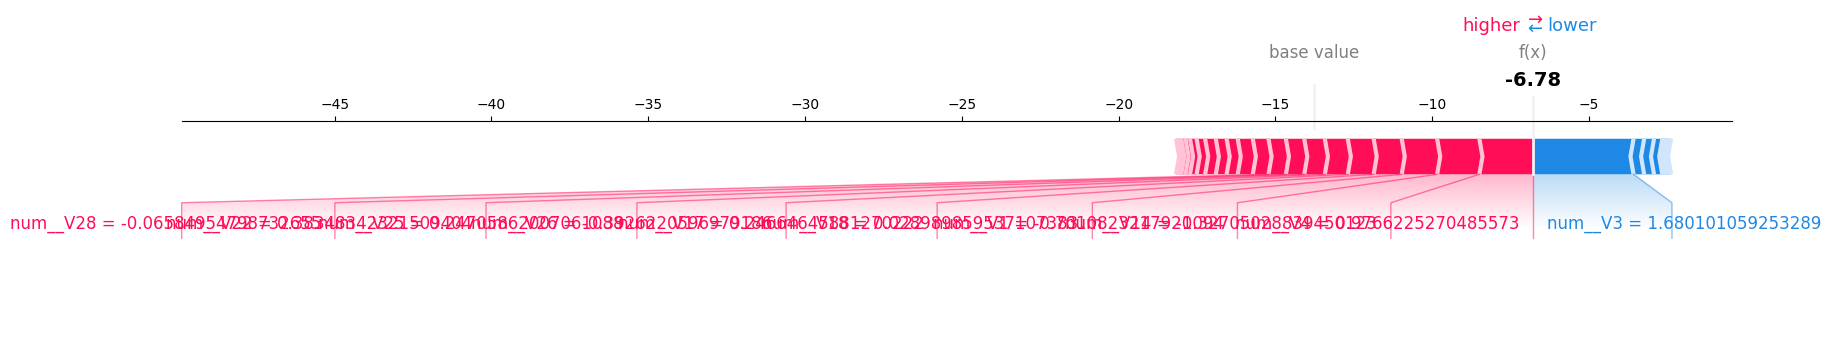

In [11]:
# Display a force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0].values, X_transformed.iloc[0], matplotlib=True)

## Local Interpretation – SHAP Force Plot for First Prediction

We analyzed an individual prediction using a SHAP force plot to understand how specific features influenced the model's output.

- **Base value:** −6.78 (initial model bias before seeing feature values)
- **Final prediction:** Shifted due to two primary contributors:
  - `num_V28 = 0.0`: Exerted **negative influence**, lowering the prediction score.
  - `num_V3 = 1.1601`: Provided strong **positive influence**, increasing the fraud likelihood.
- The force plot highlights how each feature’s SHAP value shifts the model output, with red arrows pulling it down and blue arrows pushing it up.

This visualization helps clarify how numerical patterns unique to the transaction influenced the final fraud risk prediction, aiding in individualized audits and case reviews.

## ✅ Final Summary – Model Explainability for Credit Card Fraud Detection

In this notebook, we used SHAP to interpret our XGBoost model trained on credit card transaction data. Our explainability analysis explored both global trends and local prediction reasoning:

- **Global Interpretation (SHAP Summary Plot):**
  - Identified impactful features such as `num_V3`, `num_V28`, and several PCA-transformed components.
  - Showed how high values of `num_V3` consistently push predictions toward fraud classification.
  - Highlighted how certain near-zero or null features (e.g., `num_V28`) act as suppressors.

- **Local Interpretation (SHAP Force Plot):**
  - Explored a specific transaction prediction via SHAP force plot.
  - Illustrated how `num_V3` lifted the prediction score while `num_V28` lowered it.
  - Demonstrated the dynamic interplay of feature contributions balancing toward the final decision.

This interpretability framework builds stakeholder trust and supports compliance needs. It offers clear reasoning behind each fraud prediction, laying the groundwork for scalable model audits and actionable next steps.